### 0) Read in Covid-19 and food data

In [2]:
import pandas as pd 
import numpy as np

cols_to_drop = ['Obesity', 'Undernourished', 'Active','Unit (all except Population)']
covid_cols = ['Confirmed', 'Deaths', 'Recovered', 'Population']

data_food_intake_percentage = (pd.read_csv("Food_Supply_Quantity_kg_Data.csv")).drop(columns=cols_to_drop)
data_country_names = (data_food_intake_percentage.loc[:, 'Country']).values.tolist()

data_covid = data_food_intake_percentage[covid_cols].copy()
data_food_intake_percentage = (data_food_intake_percentage.drop(columns=covid_cols)).drop(columns=['Country'])

# Will use to label in nutrition dataset
data_food_descriptions = pd.read_csv("Supply_Food_Data_Descriptions.csv").to_numpy()

In [3]:
data_food_intake_percentage.head()

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products
0,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,...,0.2953,0.0574,0.8802,0.3078,1.3489,0.0,0.0770,0.5345,6.7642,40.5645
1,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,...,0.2380,0.0008,1.8096,0.1055,1.5367,0.0,0.1515,0.3261,11.7753,31.2304
2,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,...,0.4783,0.0557,4.1340,0.2216,1.8342,0.0,0.1152,1.0310,11.6484,40.3651
3,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,...,0.6507,0.0009,18.1102,0.0508,1.8495,0.0,0.0061,0.6463,2.3041,45.0722
4,3.5764,0.0087,16.6613,0.0,5.9960,0.2274,4.1489,10.7451,5.6888,6.3663,...,0.1840,0.1524,1.4522,0.1564,3.8749,0.0,0.0253,0.8102,5.4495,33.3233


In [4]:
data_food_col_names = data_food_intake_percentage.columns.values.tolist()

data_food_intake_percentage = data_food_intake_percentage.to_numpy()
data_covid = data_covid.to_numpy()

print(data_food_col_names)
print(data_food_intake_percentage)

['Alcoholic Beverages', 'Animal fats', 'Animal Products', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables', 'Vegetal Products']
[[1.40000e-03 1.97300e-01 9.43410e+00 ... 5.34500e-01 6.76420e+00
  4.05645e+01]
 [1.67190e+00 1.35700e-01 1.87684e+01 ... 3.26100e-01 1.17753e+01
  3.12304e+01]
 [2.71100e-01 2.82000e-02 9.63340e+00 ... 1.03100e+00 1.16484e+01
  4.03651e+01]
 ...
 [3.64000e-02 4.46000e-02 5.78740e+00 ... 1.08110e+00 3.21350e+00
  4.42126e+01]
 [5.73600e+00 8.29000e-02 6.01970e+00 ... 6.65700e-01 3.46490e+00
  4.39789e+01]
 [4.05520e+00 7.55000e-02 8.14890e+00 ... 1.71030e+00 2.32130e+00
  4.18526e+01]]


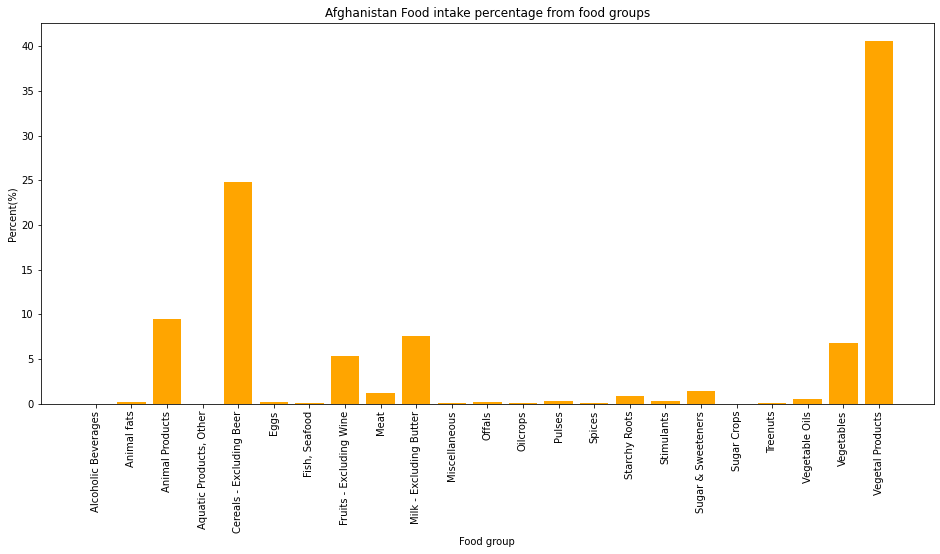

In [5]:
import matplotlib.pyplot as plt
x = np.arange(len(data_food_col_names))

# Plot Average supply_intake Note: adds up to 100%
plt.figure(4, figsize=(16,7))
plt.title('Afghanistan Food intake percentage from food groups')
plt.ylabel("Percent(%)")
plt.xlabel("Food group")

axes = plt.gca()
axes.set_xticks(x)
axes.set_xticklabels(data_food_col_names)
plt.bar(x, data_food_intake_percentage[0, :],  color='orange')
plt.xticks(rotation='vertical')
plt.show()

### 1) Sort each data subset by (#recovered_percent / #confirmed_percent) ratio and grab top k countries with best ratio.
###     ppl_confirmed = (#confirmed_percent/100) * population
###     ppl_recovered =  ppl_confirmed * (#recovered_percent / #confirmed_percent) 

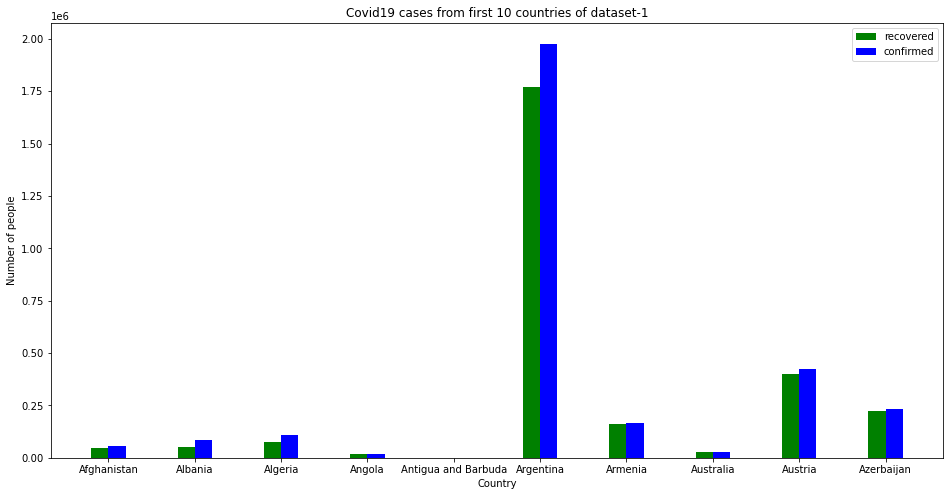

In [6]:
recovered_percentage = data_covid[:, 2] / data_covid[:, 0]

# Bar graph of first 10 countries with confirmed_ppl covid cases and recovered_ppl covid cases
confirmed_ppl = np.multiply(data_covid[:, 0]/100, data_covid[:, 3])
recovered_ppl = np.multiply(confirmed_ppl, recovered_percentage)

x = np.arange(len(data_country_names))
width = 0.2  # the width of the bars
n = 10 # number of samples to show

fig, ax = plt.subplots()
rects1 = ax.bar(x[:n] - width/2, recovered_ppl[:n], width, label='recovered', color='g')
rects2 = ax.bar(x[:n] + width/2, confirmed_ppl[:n], width, label='confirmed', color='b')

ax.set_ylabel('Number of people')
ax.set_xlabel('Country')
ax.set_title('Covid19 cases from first 10 countries of dataset-1')
ax.set_xticks(x[:n])
ax.set_xticklabels(data_country_names[:n])
fig.set_figheight(8)
fig.set_figwidth(16)
ax.legend()

plt.show()

In [7]:
sorted_recovered_indices = np.flip(np.argsort(recovered_percentage))
sorted_recovered_percentage = recovered_percentage[sorted_recovered_indices]

nan_array = np.isnan(sorted_recovered_percentage) # Remove nan from sorted indicies

sorted_recovered_indices = sorted_recovered_indices[(~nan_array)]

top_k = int(len(data_country_names) * 0.10) # Take top 10% of countries that recovered the best
top_k_sorted_recovered_indices = sorted_recovered_indices[:top_k]

top_k_countries = [data_country_names[indx] for indx in top_k_sorted_recovered_indices]

print("Top K countries:", top_k_countries) 
top_k_food_intake_percentage = data_food_intake_percentage[top_k_sorted_recovered_indices]

Top K countries: ['Vanuatu', 'Samoa', 'Tajikistan', 'Iceland', 'Grenada', 'Nepal', 'Djibouti', 'Uzbekistan', 'Central African Republic', 'Guinea', 'Saudi Arabia', 'Azerbaijan', 'India', 'Georgia', 'Croatia', 'New Zealand', 'Kyrgyzstan']


### 2) Find best food groups using top k countries highest food intake

In [8]:
from collections import Counter

# 1. Find top k2=8 food groups on what each country eats/intakes the most
top_food_groups_bag = list()
top_k2 = 5

for i in range(len(top_k_food_intake_percentage)):
    cur_country = top_k_food_intake_percentage[i]
    sorted_food_group_indices = np.flip(np.argsort(cur_country))[:top_k2]
    top_food_groups_bag.extend(list(sorted_food_group_indices))
    
# 2. Find top k3=2 common food groups. These are the best food groups agaisnt covid-19
top_k3 = 2
food_group_to_counter = Counter(top_food_groups_bag)
best_food_groups = [food_group for food_group, count in food_group_to_counter.most_common(top_k3)]
print(food_group_to_counter)
print(best_food_groups)

best_food_groups_names = [data_food_col_names[indx] for indx in best_food_groups]
print(best_food_groups_names)

Counter({22: 17, 2: 16, 4: 15, 21: 10, 9: 10, 7: 6, 15: 5, 12: 2, 8: 2, 0: 1, 17: 1})
[22, 2]
['Vegetal Products', 'Animal Products']


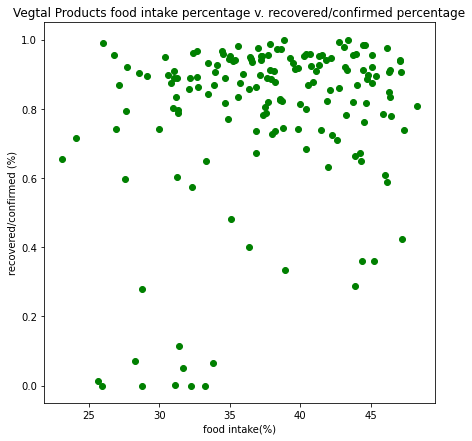

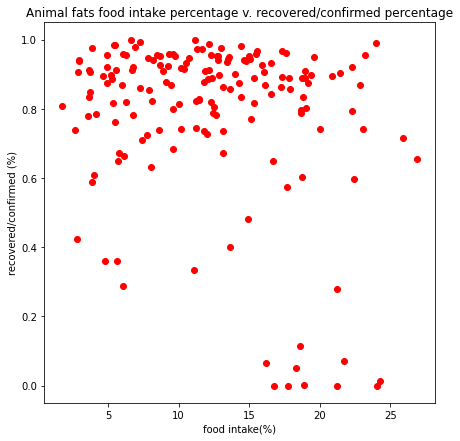

In [9]:
plt.figure(4, figsize=(7,7))
plt.title("Vegtal Products food intake percentage v. recovered/confirmed percentage")
plt.ylabel("recovered/confirmed (%)")
plt.xlabel("food intake(%)")
plt.scatter(data_food_intake_percentage[:, best_food_groups[0]], recovered_percentage, color='g')

plt.figure(5, figsize=(7,7))
plt.title("Animal fats food intake percentage v. recovered/confirmed percentage")
plt.ylabel("recovered/confirmed (%)")
plt.xlabel("food intake(%)")
plt.scatter(data_food_intake_percentage[:, best_food_groups[1]], recovered_percentage, color='r')

### 3) Load dataset-2 (nutrition data) 

In [10]:
data_nutrition = pd.read_csv("nutrition.csv")
data_nutrition = data_nutrition.drop(data_nutrition.columns[0], axis=1)
data_nutrition.head()

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [11]:
import re

nutrition_food_names = data_nutrition['name'].to_numpy() #.values.tolist()
foods_by_nutrients = data_nutrition.drop(columns=['name', 'serving_size'])
nutrient_feature_names = foods_by_nutrients.columns.values.tolist()
foods_by_nutrients = foods_by_nutrients.to_numpy()

for i in range(foods_by_nutrients.shape[0]): # Remove units from values
    for j in range(foods_by_nutrients.shape[1]):
        cur_val = foods_by_nutrients[i][j]
        if isinstance(cur_val, str):
            foods_by_nutrients[i][j] = float(re.sub("[^0-9]", "", cur_val))
            
foods_by_nutrients = foods_by_nutrients.astype(float)

In [12]:
# Random Sub-sample to reduce dataset size from 8789 -> 1000
np.random.seed(0)
random_indices = np.random.choice(range(foods_by_nutrients.shape[0]), size=1000, replace=False)
foods_by_nutrients = foods_by_nutrients[random_indices, :]
nutrition_food_names = nutrition_food_names[random_indices]

### 4) map food groups -> some foods.  Then find similar foods from nutrition dataset-2 that are like the foods
###     mapped. Will be doing labeling based of text names of foods.

In [13]:
#print(data_food_descriptions)

# Dictionary keys from food_groups
food_group_to_foods = dict()
food_group_to_foods[2] = ['butter', 'ghee', 'fats', 'fish', 'eggs', 'milk'] 
food_group_to_foods[22] = ['vegetables','onions', 'tomatoes'] 
food_group_to_foods[4] = ['barley', 'oats', 'rice', 'rye', 'sorghum', 'wheat'] 
food_group_to_foods[7] = ['apples', 'bananas', 'oranges', 'dates', 'grapes', 'lemons','pineapples']
food_group_to_foods[0] = ['alcohol', 'beer']
food_group_to_foods[8] = ['beef', 'meat', 'goat', 'pig']
food_group_to_foods[16] = ['tea', 'coffee']
food_group_to_foods[17] = ['sugar', 'honey']
food_group_to_foods[19] = ['nuts']

# Create some labels based on text name of a food for easy labeling -> semi-supervised learning  
nutrition_labels = np.empty(foods_by_nutrients.shape[0])
nutrition_labels[:] = np.NaN

# Find similar foods from nutrition dataset2 that text is similar to the foods given from food_descriptions dataset1
for i in range(len(nutrition_food_names)):
    
    for key, value in food_group_to_foods.items():
        has_found_food = False
        for cur_food in value:
            if cur_food in nutrition_food_names[i].lower():
                nutrition_labels[i] = key
                has_found_food = True
                break
                
        if has_found_food:
            break
            
print(nutrition_labels)

c = 0
for val in nutrition_labels:
    if np.isnan(val):
        c +=1
print("Number of unlabeled foods:", c)

[nan nan nan nan nan nan 19.  8. nan  8. nan nan 22. nan  8.  4. nan nan
  2. nan nan nan nan nan nan nan nan nan  4. nan nan nan nan nan nan nan
  4. nan nan nan  2. 17. nan nan  4. nan nan nan  2. nan nan nan nan  2.
  8. nan  8.  4. nan nan  2. nan nan  4. nan nan nan nan  8. nan nan nan
 nan nan nan nan  2. nan nan  7.  8. nan nan 17. nan nan nan 17.  8. nan
  8. 17.  4.  8. nan  8. nan  8. nan nan  8. nan  4.  4.  8. nan  4.  8.
 nan  4. 16. nan  2.  8.  4. nan 17.  2.  8.  8. nan nan nan nan nan  8.
 16. nan nan nan nan nan  2. nan nan nan nan nan nan nan nan nan nan  4.
  2. nan nan  8. nan nan  8. nan nan nan nan 22. nan nan  4.  2.  8. nan
 nan nan  2. nan nan 19.  8.  8. nan  2. nan  7. nan nan nan  8.  2. nan
  2. nan  8.  8. nan nan 16.  8.  2.  8. nan nan  2.  8.  4. nan nan  2.
  8.  2. nan nan nan nan  2.  0.  8. nan nan nan nan nan nan 16. nan nan
 nan 17. nan nan nan  8. nan 16.  4. 16. nan  8.  2. nan nan 19. nan  4.
  8.  8.  2. 19. nan  4. nan nan nan nan nan 22. na

### 4) Find corresponding foods in dataset-2 using descriptions of food groups in dataset-1

Pearson correlation to find top 5 strongly similar foods for each food in nutrition.csv and build an edge for graph

Helpful Resource: https://www.statisticssolutions.com/pearsons-correlation-coefficient/#:~:text=Perfect%3A%20If%20the%20value%20is,to%20be%20a%20strong%20correlation. 

In [14]:
# 1. Pearson correlation
n = 5 # number of neighboors for a food
corr_threshold = 0.5 

# Similarity: calculate pearson correlation for an active food for each food 
food_food_weights = np.corrcoef(np.nan_to_num(foods_by_nutrients))

# Grab the 5 most similar foods for an active food that MUST BE strongly correlated (0.5 <= val <= 1)
food_10SimilarFoods = np.zeros((foods_by_nutrients.shape[0], n))
for i in range(len(food_10SimilarFoods)):
    sorted_indexes = np.argsort(food_food_weights[i])
    top10_sorted_indexes = sorted_indexes[::-1][1:n+1] # So it does not grab its own weight=1

    # Check that similar foods are strongly correlated based on nutrients -> will be used to build edges
    top10_strongly_sorted_indexes = np.empty(top10_sorted_indexes.shape[0])
    top10_strongly_sorted_indexes[:] = np.NaN

    for j in range(top10_sorted_indexes.shape[0]):
        corr_val = food_food_weights[i][top10_sorted_indexes[j]]
        if corr_val >= corr_threshold:
            top10_strongly_sorted_indexes[j] = top10_sorted_indexes[j]

    food_10SimilarFoods[i] = top10_strongly_sorted_indexes

print(food_10SimilarFoods)

[[369. 743. 564. 797. 104.]
 [280. 285. 371. 690. 166.]
 [828. 387. 273. 469. 373.]
 ...
 [566.  39. 516. 494. 824.]
 [637. 938. 952. 341. 956.]
 [633.  95. 864. 160. 790.]]


### 5) Build graph using foods correlation, and highlight best foods with colored nodes

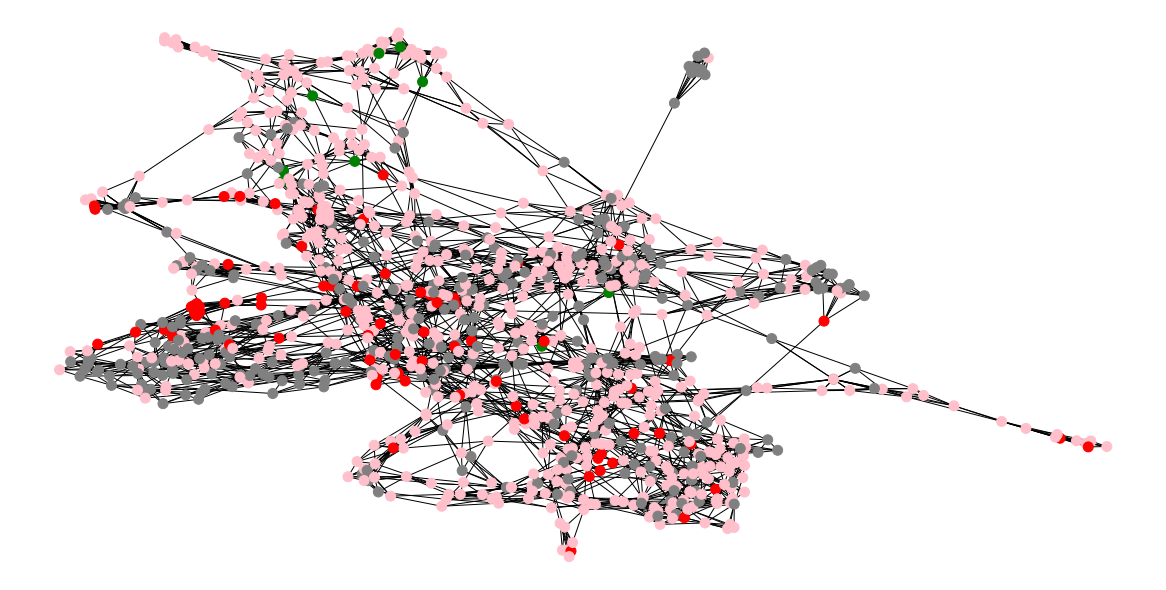

In [15]:
import networkx as nx

G = nx.Graph()
nan_label = -2 # This is for the nutrition_labels unlabeled data

for i in range(food_10SimilarFoods.shape[0]): # Add Nodes to graph with their label attribute
    cur_label = nutrition_labels[i]
    if np.isnan(cur_label):
        G.add_node(i, food_label=nan_label)
    else:
        G.add_node(i, food_label=cur_label)

color_map = list()
for i in range(G.number_of_nodes()):
    if G.nodes[i]['food_label'] == 22:
        color_map.append("green")
    elif G.nodes[i]['food_label'] == 2:
        color_map.append("red")
    elif G.nodes[i]['food_label'] == 4 or G.nodes[i]['food_label'] == 7 or G.nodes[i]['food_label'] == 0 or\
    G.nodes[i]['food_label'] == 8 or G.nodes[i]['food_label'] == 16 or G.nodes[i]['food_label'] == 17 or\
    G.nodes[i]['food_label'] == 19:
        color_map.append("grey") # Other food groups
    else:
        color_map.append("pink") # Unlabeled data

    # Add edges
    for s_indx in food_10SimilarFoods[i]:
        if not np.isnan(s_indx) and not G.has_edge(i, int(s_indx)):
            G.add_edge(i, int(s_indx), weight=food_food_weights[i][int(s_indx)])

plt.figure(1, figsize=(16,8))
nx.draw(G, node_color=color_map, node_size= 100)

### 6) Perform semi-supervised label propagation to identify the rest of the foods and print out some combative foods against covid19

In [16]:
# Label propogation
#1) Build degree matrix 
adj_matrix = np.array((nx.adjacency_matrix(G)).todense())
degree_array = np.zeros(G.number_of_nodes())
labeled_nodes = np.array([22, 2, 4, 7, 0, 8, 16, 17, 19]) 

for i in range(degree_array.shape[0]):
    degree_array[i] = G.degree(i)

print("Graph # of Edges: ", G.number_of_edges())
print("Adjacency Matrix:\n", adj_matrix)

degree_matrix = np.zeros((len(adj_matrix), len(adj_matrix[0])))
for i in range(len(degree_matrix)):
    i_is_labeled_node = i in labeled_nodes

    for j in range(len(degree_matrix[0])):
        j_is_labeled_node = j in labeled_nodes

        if i_is_labeled_node and j_is_labeled_node: # Probability to get from labeled nodes to labeled nodes
            if i == j: # Labeled nodes are absorbtion nodes
                degree_matrix[i][j] = 1
        elif i_is_labeled_node: # Probability to get from labeled nodes to Unlabeled nodes = 0
            continue
        elif j_is_labeled_node: # Probability to get from Unlabeled nodes to labeled nodes
            if adj_matrix[i][j] != 0: # If there is an edge
                degree_matrix[i][j] = adj_matrix[i][j] / degree_array[i]
        else: # Probability to get from Unlabeled nodes to Unlabeled nodes
            if adj_matrix[i][j] != 0: 
                degree_matrix[i][j] = adj_matrix[i][j] / degree_array[i]    

print("Degree Matrix:\n", degree_matrix)

#2) Do semi-supervised label propagation
T_matrix = np.array(degree_matrix)
epsilon = 0.0001
T_uu = 100000000
t = 1 # time it takes to finish propogating

while T_uu > epsilon: # Label propogation until convergence
    T_uu = 0
    T_matrix = np.dot(T_matrix, T_matrix)

    for i in range(T_matrix.shape[0]):
        i_is_labeled_node = i in labeled_nodes
        if i_is_labeled_node == True:
            continue

        for j in range(T_matrix.shape[1]):
            j_is_labeled_node = j in labeled_nodes
            # Look at Probabilities from Unlabeled nodes to Unlabeled nodes
            if j_is_labeled_node == False: 
                T_uu += T_matrix[i][j]

    print("time<", t, ">: T_uu value =" , T_uu)
    t += 1 

Graph # of Edges:  3608
Adjacency Matrix:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Degree Matrix:
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
time< 1 >: T_uu value = 894.3713695928425
time< 2 >: T_uu value = 816.8301958652531
time< 3 >: T_uu value = 691.97079957983
time< 4 >: T_uu value = 513.1519285566235
time< 5 >: T_uu value = 302.70532074136645
time< 6 >: T_uu value = 123.72337338515034
time< 7 >: T_uu value = 28.67769136101106
time< 8 >: T_uu value = 2.3826957438157823
time< 9 >: T_uu value = 0.021917239465996673
time< 10 >: T_uu value = 2.0424659986712715e-06


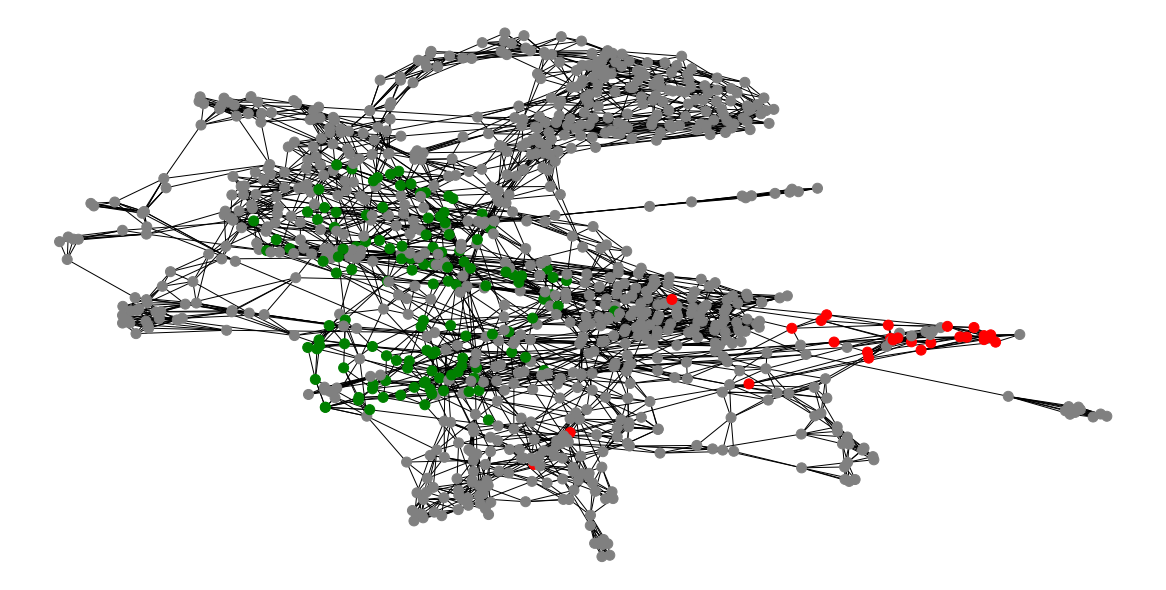

In [17]:
pred_color_map = list(color_map)
Y_best_food_eat = np.zeros(len(pred_color_map))

for i in range(T_matrix.shape[0]):
    i_is_labeled_node = i in labeled_nodes
    pred_color_map[i] = 'grey' # Want all other nodes(besides the best food) to be show as grey
    if i_is_labeled_node == True:
        continue

    max_prob_val = 0
    max_prob_indx = None
    for j in range(T_matrix.shape[1]):
        j_is_labeled_node = j in labeled_nodes

        # Look at Probabilities from unlabeled nodes to labeled nodes
        if j_is_labeled_node == True and T_matrix[i][j] > max_prob_val:
            max_prob_val = T_matrix[i][j]
            max_prob_indx = j

    if max_prob_indx == labeled_nodes[0]: #labeled_nodes=[22, 2, 4, 7, 0, 8, 16, 17, 19]
        pred_color_map[i] = "green"
        Y_best_food_eat[i] = labeled_nodes[0]
    elif max_prob_indx == labeled_nodes[1]:
        pred_color_map[i] = "red"
        Y_best_food_eat[i] = labeled_nodes[1]

plt.figure(2, figsize=(16,8))
nx.draw(G, node_color=pred_color_map, node_size= 100)

### 7) Do 10-fold cross validation on label propagation model best foods to eat(Vegtables&Animal fats) and 
###     check accuracy by difference of labels generated.

In [18]:
from sklearn.model_selection import KFold
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=10) # 10-fold 
X = np.array(np.nan_to_num(foods_by_nutrients))
Y = np.array(Y_best_food_eat)

avg_accuracy = 0

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    label_prop_model = LabelPropagation()
    label_prop_model.fit(X_train, Y_train)

    test_pred_y = label_prop_model.predict(X_test)
   
    accuracy = accuracy_score(Y_test, test_pred_y)
    print('Accuracy: %f' % (accuracy))
    avg_accuracy += accuracy

avg_accuracy /= kf.get_n_splits(X)
print("Average Accuracy of label propogation classification: ", avg_accuracy)

C:\Anaconda\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Anaconda\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Anaconda\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Accuracy: 0.840000
Accuracy: 0.810000
Accuracy: 0.840000


C:\Anaconda\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Anaconda\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Anaconda\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Accuracy: 0.780000
Accuracy: 0.840000
Accuracy: 0.860000


C:\Anaconda\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Anaconda\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Anaconda\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Accuracy: 0.890000
Accuracy: 0.840000
Accuracy: 0.890000
Accuracy: 0.900000
Average Accuracy of label propogation classification:  0.8489999999999999


C:\Anaconda\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:205: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


In [19]:
import shap

# Print the JS visualization code in the Jupyter notebook
shap.initjs()

### 8) Print some example best foods for Covid and Draw SHAP plots

Some Vegetal Products:  ['Peas, with salt, drained, boiled, cooked, sprouted, mature seeds', 'KASHI, Frozen Entree, Chicken Fettuccine, STEAM MEAL', 'Cookies, baked, refrigerated dough, peanut butter', "CRACKER BARREL, from kid's menu, macaroni n' cheese plate", 'Beverage, not chocolate, dry, milkshake mix', 'SPAGHETTIOS, easy open, SpaghettiOs Original', 'Pigeon peas (red gram), with salt, boiled, cooked, mature seeds', 'Snacks, baked, restructured, white, potato chips', 'MORNINGSTAR FARMS Roasted Garlic & Quinoa Burger, unprepared, frozen', 'Beans, low sodium, canned, mature seeds, great northern']


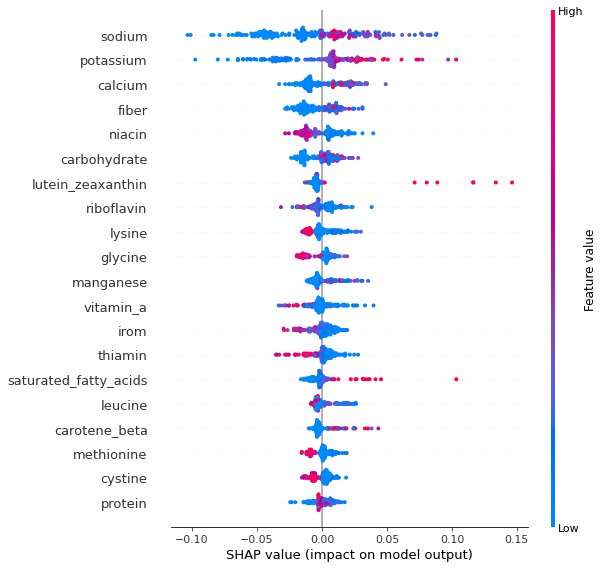

In [25]:
from sklearn.ensemble import RandomForestClassifier

covid_combative_foods = {'Vegetal Products': [], 'Animal Products': []}

for i in range(len(Y_best_food_eat)):
    if data_food_col_names[int(Y_best_food_eat[i])] == 'Vegetal Products':
        covid_combative_foods['Vegetal Products'].append(nutrition_food_names[i])
    elif data_food_col_names[int(Y_best_food_eat[i])] == 'Animal Products':
        covid_combative_foods['Animal Products'].append(nutrition_food_names[i])
        
# text biased results: when I calculated inital labels for label propagation, since it is based on string name of food item
print("Some Vegetal Products: ", covid_combative_foods['Vegetal Products'][15:25]) 

# Draw SHAP plot
X_foods = np.nan_to_num(foods_by_nutrients)
Y_foods = np.array([1 if val != 0 else 0 for val in Y_best_food_eat])

train_size = int(len(X_foods) * 0.8)
train_X, test_X = X_foods[0: train_size], X_foods[train_size:]
train_Y, test_Y = Y_foods[0: train_size], Y_foods[train_size:]

rf = RandomForestClassifier(random_state=0)
rf.fit(train_X, train_Y)

test_pred_y = rf.predict(test_X)

# Load SHAP explainer
explainer = shap.TreeExplainer(rf)

# Print summary plot
shap_values = explainer.shap_values(test_X)
shap.summary_plot(shap_values[1], test_X, feature_names=nutrient_feature_names)